# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
api_key = weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['busselton',
 'pallasovka',
 'lebu',
 'tuktoyaktuk',
 'duzce',
 'hunchun',
 'pangnirtung',
 'nefteyugansk',
 'denpasar',
 'punta arenas',
 'songjianghe',
 'tsihombe',
 'upernavik',
 'sentyabrskiy',
 'ushuaia',
 'hermanus',
 'thompson',
 'cockburn town',
 'nuevo progreso',
 'berlevag',
 'dickinson',
 'souillac',
 'east london',
 'arraial do cabo',
 'gao',
 'clyde river',
 'melito di porto salvo',
 'galveston',
 'geraldton',
 'albany',
 'aasiaat',
 'puerto ayora',
 'maraa',
 'sebinkarahisar',
 'kirensk',
 'rikitea',
 'taolanaro',
 'kodiak',
 'cape town',
 'hasaki',
 'nerchinskiy zavod',
 'hobart',
 'papara',
 'mataura',
 'atuona',
 'mahibadhoo',
 'katangli',
 'bitung',
 'saskylakh',
 'hurricane',
 'hilo',
 'san jeronimo',
 'umarkot',
 'jamestown',
 'qaqortoq',
 'tiksi',
 'kavaratti',
 'aykhal',
 'nikolskoye',
 'gushikawa',
 'barentsburg',
 'kristiinankaupunki',
 'port alfred',
 'barrow',
 'ilulissat',
 'avarua',
 'angoche',
 'hovd',
 'qaanaaq',
 'bluff',
 'camacha',
 'inuvik',
 'sept-il

In [5]:
#url
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'


#build query
# query_url = url + 'q=' + city + '&appid=' + api_key

query_url = f'{url}appid={api_key}&units={units}&q='


# request = requests.get(query_url)
# request = request.json()

# request



#set up lists to hold response info
city_name = []
lng = []
lat = []
temp_max = []
humid = []
cloudiness = []
winds = []
countries =[]
date = []
city_data = []


# # # #loop through the list of cities and prform a request for data on each
for city in cities:
    
      #create the request, get response
        response = requests.get(query_url + city).json()
           
        #append different variables 
        city_name.append(response['name'])
        
        lat.append(response['coord']['lat'])
        
        lng.append(response['coord']['lon'])
        
        temp_max.append(response['main']['temp_max'])
        
        humid.append(response['main']['humidity'])

        cloudiness.append(response['clouds']['all'])
        
        winds.append(response['wind']['speed'])

        countries.append(response['sys']['country'])

        date.append(response['dt'])
        
        print(response['name'])

# print(f"The latitude information received is: {lng}")
# print(f"The temperature information received is: {lat}")
# print(f"The latitude information received is: {temp_min}")
# print(f"The temperature information received is: {temp_max}")
# print(f"The latitude information received is: {humid}")
# print(f"The temperature information received is: {winds}")
# print(f"The latitude information received is: {clouds}")







Busselton
Pallasovka
Lebu
Tuktoyaktuk
Düzce
Hunchun
Pangnirtung
Nefteyugansk
Denpasar
Punta Arenas
Songjianghe


KeyError: 'name'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#created dataframe

the_weather_df = pd.DataFrame({'City': city_name,
                               'Lat': lat,
                               'Lng': lng,
                               'Max Temp':temp_max,
                               'Humidity':humid,
                               'Wind': winds,
                               'Cloudiness': cloudiness,
                               'Country':countries,
                               'Date':date})

the_weather_df
#saved data to csv
the_weather_df.to_csv('BB_Homework.csv')


In [7]:
the_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,Busselton,-33.6500,115.3333,14.02,82,5.08,99,AU,1666637094
1,Pallasovka,50.0500,46.8833,8.70,98,2.54,100,RU,1666636904
2,Lebu,-37.6167,-73.6500,14.46,75,3.81,7,CL,1666636831
3,Tuktoyaktuk,69.4541,-133.0374,-10.00,79,2.06,75,CA,1666637095
4,Düzce,40.8389,31.1639,14.39,75,1.68,0,TR,1666637095


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#used this to find all the cities where 'Humidity' is greater than [xyz] 
the_weather_df.loc[the_weather_df['Humidity']>100]


,City,Lat,Lng,Max Temp,Humidity,Wind,Cloudiness,Country,Date


In [ ]:
#get the indices of cities that have humidity over 100%.


In [ ]:
#make a new DataFrame equal to the city data to drop all humidity outliers by index.
#passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

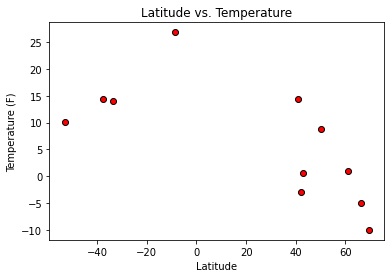

In [9]:
#create scatter plot for Lat vs Temp.


plt.scatter(the_weather_df['Lat'],
            the_weather_df['Max Temp'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Homework_6')
plt.show()




## Latitude vs. Humidity Plot

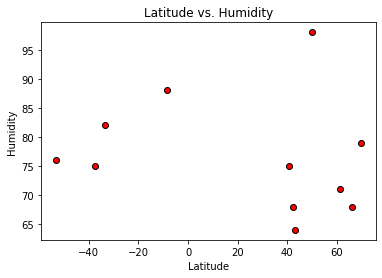

In [10]:
#create scatter plot for Lat vs Humidity.


plt.scatter(the_weather_df['Lat'],
            the_weather_df['Humidity'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Latitude_vs_Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

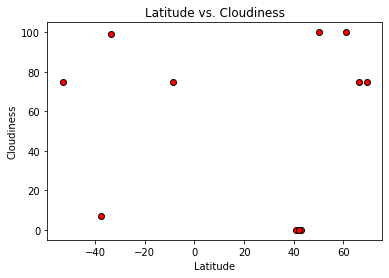

In [11]:
#create scatter plot for Lat vs Cloudiness.


plt.scatter(the_weather_df['Lat'],
            the_weather_df['Cloudiness'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Latitude_vs_Cloudiness.png')
plt.show()


## Latitude vs. Wind Speed Plot

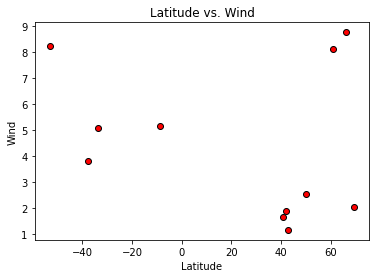

In [12]:
#create scatter plot for Lat vs Wind Speed Plot.


plt.scatter(the_weather_df['Lat'],
            the_weather_df['Wind'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Wind')
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.savefig('Latitude_vs_Wind.png')
plt.show()

## Linear Regression

In [13]:
#create North Hemisphere Dataframe
north_hem = the_weather_df.loc[the_weather_df['Lat'] >= 0]

In [14]:
#create South Hemisphere Dataframe
south_hem = the_weather_df.loc[the_weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4406432605217695


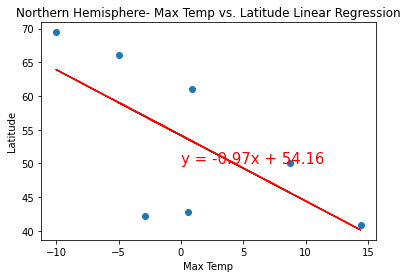

In [15]:
#created scatter plot for Max Temp vs. Latitude Linear Regression

x_values = north_hem['Max Temp']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Max Temp vs Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.9527025199080331


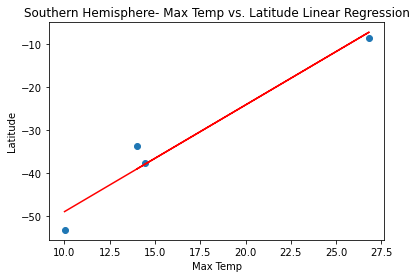

In [16]:
#created scatter plot for Max Temp vs. Latitude Linear Regression

x_values = south_hem['Max Temp']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Max Temp vs Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4406432605217695


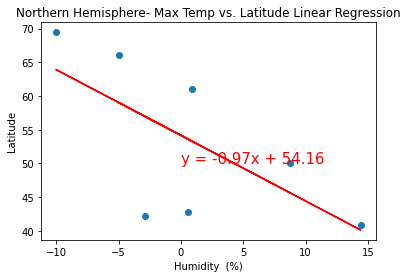

In [17]:
#created scatter plot for Humidity vs. Latitude Linear Regression

x_values = north_hem['Max Temp']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp vs. Latitude Linear Regression')
plt.xlabel('Humidity  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Humidity vs Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.7973151884443461


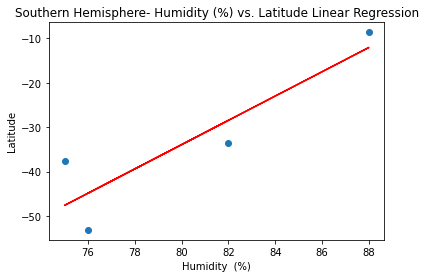

In [18]:
#created scatter plot for Humidity vs. Latitude Linear Regression

x_values = south_hem['Humidity']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Humidity vs Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5783631472865753


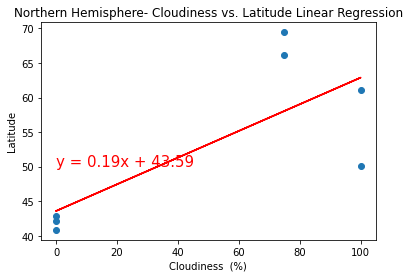

In [19]:
#created scatter plot for Cloudiness vs. Latitude Linear Regression

x_values = north_hem['Cloudiness']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Cloudiness  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Cloudiness vs Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.017069279087443427


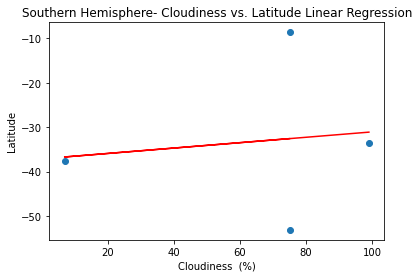

In [20]:
#created scatter plot for Cloudiness vs. Latitude Linear Regression

x_values = south_hem['Cloudiness']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Cloudiness  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Cloudiness vs Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3963569791591892


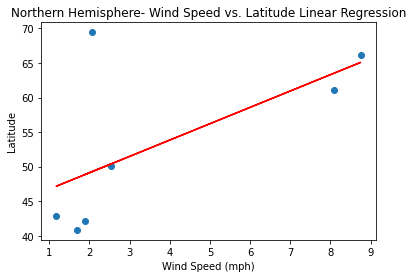

In [21]:
#created scatter plot for Wind Speed (mph) vs. Latitude Linear Regression

x_values = north_hem['Wind']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Wind Speed vs Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [2]:
#created scatter plot for Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_hem['Wind']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Wind Speed vs. Latitude Linear Regression '10/24/2022')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Wind Speed vs Lat.png')
plt.show()

NameError: name 'south_hem' is not defined